<a href="https://colab.research.google.com/github/Mawaxyl/Building-Neural-Network-to-Predict-Sarcasm-in-Text-NLP/blob/main/Building_Neural_Network_to_Predict_Sarcasm_in_Text_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TOKENIZATION

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100)
tokenizer

In [ ]:
tokenizer.fit_on_texts(sentences)
tokenizer

In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


## TURNING SENTENCES INTO DATA

In [ ]:
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [ ]:
# Lets try another sentence and test with the fitted tokenizer above
test_data = [
    'I really love my dog',
    'My dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[4, 2, 1, 3], [1, 3, 1]]


'really' missing from first sentence

'loves' and 'manatee' missing from second sentence

In [ ]:
# In order to correct that above, let's create an oov token
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token = '<oov>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(word_index)
print(sequences)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [ ]:
# Lets try it out again now
test_data = [
    'I really love my dog',
    'My dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


### Needing to train a neural network, how do we handle sentences with different lengths.

To solve that we a Ragged Tensor (Adavnced) or use simple method called Padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# In order to correct that above, let's create an oov token
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token = '<oov>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

In [ ]:
print(word_index)
print(sequences)
print(padded)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [ ]:
# if you want the zeros after the sentence
padded = pad_sequences(sequences, padding= 'post')

print(padded)

[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [ ]:
# set the length of the padded sentences to be different from the sentence
padded = pad_sequences(sequences, padding= 'post', maxlen= 5)

print(padded)

[[ 5  3  2  4  0]
 [ 5  3  2  7  0]
 [ 6  3  2  4  0]
 [ 9  2  4 10 11]]


In [ ]:
# what happens when sentences are longer than the specified maxlen,
# then use 'truncating' to chop of the word from the end (post), or begining (pre)

padded = pad_sequences(sequences, padding= 'post', truncating= 'post', maxlen= 5)

print(padded)

[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


## Training - Building a Neural Network to Understand Text

### Training a model to recognize sentiment in text
- Sarcastic
- Or Non-Sarcastic

To determine if a sentence contain sarcasm or not

The dataset is **Sarcasm in News Headlines**

`is_sarcastics`: 1 if the record is sarcastic otherwise 0

`headline`: the headline of the news article

In [1]:
import json
import tensorflow as tf


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-12-07 22:20:12--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.91, 172.217.12.27, 172.217.15.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.09s   

2023-12-07 22:20:12 (58.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [3]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

In [4]:
sentences= []
labels = []


for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [5]:
# tokenize our sentences, sequence it and pad it also
# import Tokenizer and Pad_Sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# Tokenize our sentences
tokenizer = Tokenizer(oov_token= '<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [7]:
# let's run sequence and padding
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

In [8]:
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [9]:
# setting up the needed parameters
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [10]:
# train and test splitting
training_sentences = sentences[0: training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0: training_size]
testing_labels = labels[training_size:]

In [11]:
print(len(training_sentences)), print(len(training_labels))
print(len(testing_sentences)), print(len(testing_labels))

20000
20000
6709
6709


(None, None)

In [12]:
# lets tokenize, and pad_sequence of our sentences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# training_set
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# testing_set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



In [13]:
# lets convert our padded sequence to Numpy array for Tensorflow
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [14]:
# Set our input layer, hidden layer and output layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
# Add the compile step
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# fit the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6635 - accuracy: 0.5849 - val_loss: 0.5713 - val_accuracy: 0.7834 - 5s/epoch - 8ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4254 - accuracy: 0.8367 - val_loss: 0.3851 - val_accuracy: 0.8368 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3102 - accuracy: 0.8755 - val_loss: 0.3587 - val_accuracy: 0.8450 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2602 - accuracy: 0.8985 - val_loss: 0.3463 - val_accuracy: 0.8521 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2245 - accuracy: 0.9136 - val_loss: 0.3440 - val_accuracy: 0.8575 - 4s/epoch - 6ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1985 - accuracy: 0.9243 - val_loss: 0.3508 - val_accuracy: 0.8541 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1755 - accuracy: 0.9335 - val_loss: 0.3622 - val_accuracy: 0.8536 - 2s/epoch - 4ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1579 - accuracy: 0.9416 - val_loss: 0.3786 - val_accuracy: 0.8512 - 3s/epoch - 4ms/step
Epoch 9/30
625/625 - 2s 

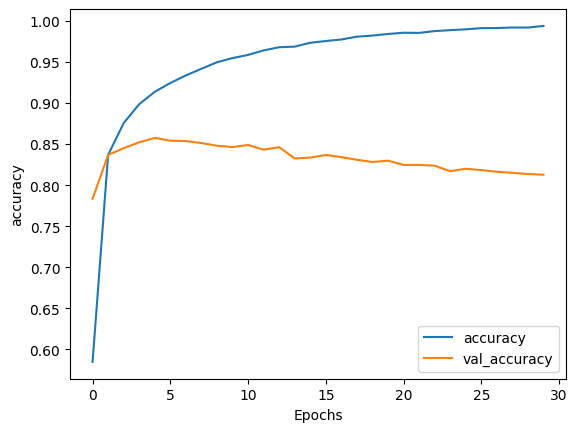

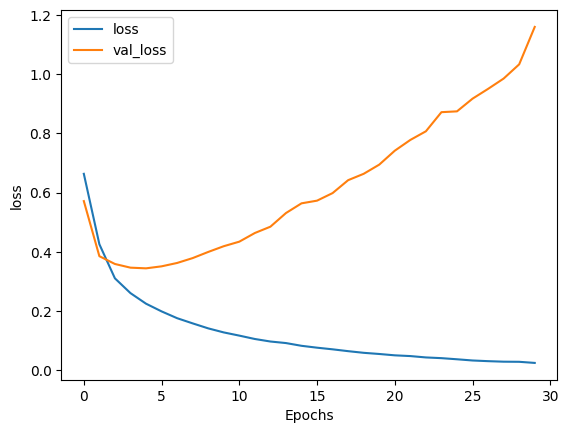

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [21]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [22]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 87ms/step
[[7.6794380e-01]
 [1.4148186e-06]]


In [24]:
sentence = ["granny starting to fear spiders in the garden might be real", "the weather today is bright and sunny"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 20ms/step
[[7.6794380e-01]
 [1.8538628e-07]]
